#### Completion
- Every feature is investigated using either histograms, bi-plots, or other visual and numeric means.
- Pearson correlation coefficients and other statistical methods were used to identify statistical relationship strengths.
#### Process and Understanding
- The submission shows that the student understands how to explore feature relationships in the data.
- The submission demonstrates that the student made data-supported decisions on when to select specific features.

##### Ideas:
- Build data profiles and tables
- Inferential statistics
- Explore data relationships
- Data visualization
- Feature Selection and Engineering

#### Explore Interactions Dataset

- sns.relplot()
- sns.lmplot()
- sns.catplot()

 [penguin["species"] for penguin in penguins if penguin["sex"] == 'FEMALE']


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Show plots inline
%matplotlib inline

In [4]:
# data paths
interactions_str = 'interactions_clean.csv'
recipes_str = 'recipes_clean.csv'

# load data
interactions = pd.read_csv(interactions_str, index_col=[0])
recipes = pd.read_csv(recipes_str,  index_col=[0])

In [6]:
recipes.head()

,recipe,recipe_id,minutes,user_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [7]:
interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


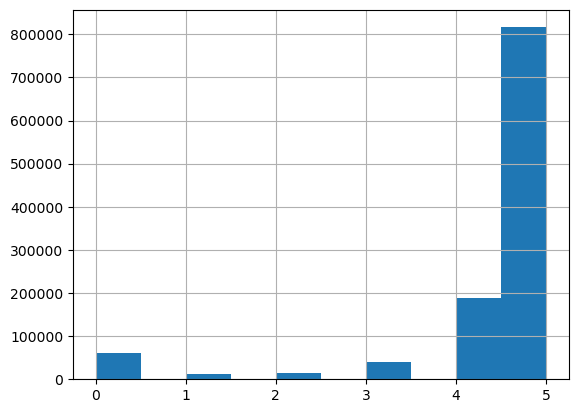

In [8]:
interactions['rating'].hist();

In [9]:
# get mean rating for each recipe
average_rating = interactions.groupby('recipe_id')['rating'].mean()

In [10]:
average_rating.describe()

count    231630.000000
mean          4.346206
std           0.990864
min           0.000000
25%           4.000000
50%           4.714286
75%           5.000000
max           5.000000
Name: rating, dtype: float64

In [11]:
interactions.shape

(1132198, 5)

In [42]:
# count the amount of ratings for each recipe
num_rated = interactions.recipe_id.value_counts()
num_rated[num_rated > 1000]

recipe_id
2886     1609
27208    1601
89204    1579
39087    1448
67256    1322
54257    1305
22782    1234
32204    1220
Name: count, dtype: int64

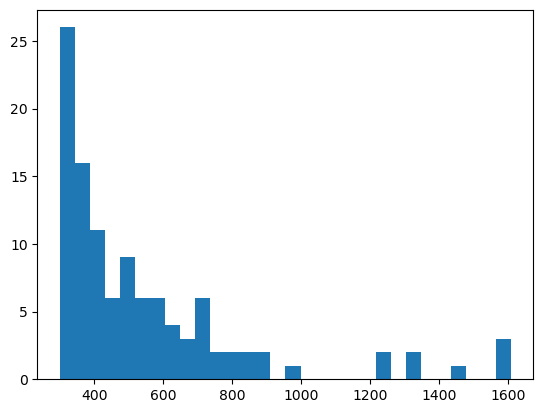

In [47]:
plt.hist(num_rated[num_rated > 300], bins=30);

Looks like the majority of recipes only have 1 rating.

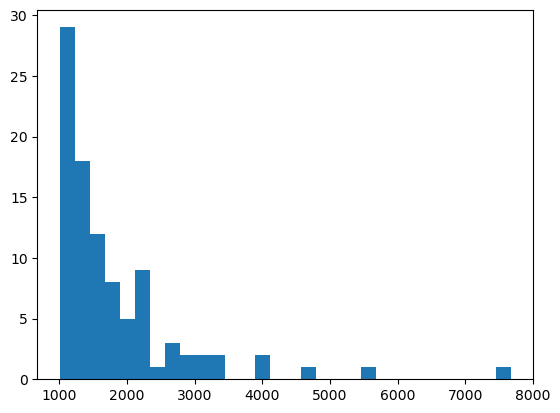

In [45]:
user_ratings = interactions.user_id.value_counts()
plt.hist(user_ratings[user_ratings > 1000], bins=30);

In [15]:
recipes.shape

(231635, 12)

In [16]:
recipes.dtypes

recipe           object
recipe_id         int64
minutes           int64
user_id           int64
submitted        object
tags             object
nutrition        object
n_steps           int64
steps            object
description      object
ingredients      object
n_ingredients     int64
dtype: object

In [17]:
#recipes_numerical = recipes[['minutes','n_steps','n_ingredients']]
#sns.heatmap(recipes_numerical.corr())

Text(0.5, 1.0, 'Mean User Recipe Rating')

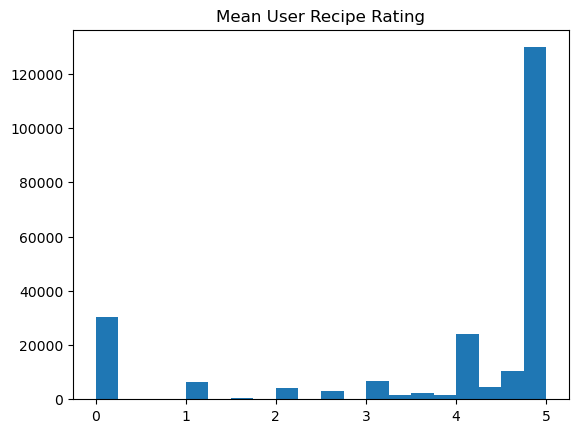

In [18]:
plt.hist(interactions.groupby('user_id')['rating'].mean(), bins=20);
plt.title('Mean User Recipe Rating')

In [19]:
# separate into 2 groups, numeric feature (rating), t-test of the averages
# look into the time between people returning back to the website to rate stuff.

low_interactions = interactions['user_id'].value_counts()[interactions['user_id'].value_counts()==1].index
high_interactions = interactions['user_id'].value_counts()[interactions['user_id'].value_counts()>1000].index

In [23]:
single_raters = interactions[interactions['user_id'].isin(low_interactions)]

In [25]:
single_raters.head()

,user_id,recipe_id,date,rating,review
7,2000192946,120345,2015-05-10,2,This recipe was OVERLY too sweet. I would sta...
9,273745,134728,2005-12-22,5,Better than the real!!
17,618928,200236,2007-10-17,4,this is an excellent got 'lamb and a tin of ch...
19,2000049093,200236,2015-03-08,5,I love lamb stew and usually make an Irish ver...
29,1413963,254596,2009-10-15,5,One word says it all . Delicious!!!


In [26]:
multi_raters =  interactions[interactions['user_id'].isin(high_interactions)]

In [28]:
multi_raters.head()

,user_id,recipe_id,date,rating,review
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
32,5060,310237,2010-05-07,5,"wow red and white sweetness! DH loved them , ..."
44,101823,79222,2006-03-21,5,Excellent chowder. This was the perfect warm-...
97,280271,219118,2008-11-09,4,This is so yummy. Quick to prepare and can sim...
98,305531,219118,2008-12-17,4,Really good carrots! There were a great side d...


In [29]:
# check to make sure it worked

multi_raters['user_id'].value_counts()

user_id
424680    7671
37449     5603
383346    4628
169430    4076
128473    3917
          ... 
37779     1016
226066    1016
315565    1015
242729    1014
47559     1014
Name: count, Length: 96, dtype: int64

### Hypothesis: 
Since it looks like there are a lot of high ratings and also a lot of ratings with only 1 rating. I want to see if people who rate often, tend to rate highly or vise versa. Or if people who have only rated once tend to rate highly or vise versa. The null hypothesis is that both low frequency and high frequency raters, tend to rate the same.

In [30]:
single_rating_mean = single_raters['rating'].mean()
multi_rating_mean =  multi_raters['rating'].mean()

In [31]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    
    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

In [34]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [35]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [33]:
# Compute difference of mean impact force from experiment: empirical_diff_means
diff_means = diff_of_means(single_raters['rating'],multi_raters['rating'])


# Compute mean of pooled data: mean_count
group_mean = np.mean(np.concatenate((single_raters['rating'],multi_raters['rating'])))

In [48]:
# Shift data sets
single_shifted = single_raters['rating'] - single_rating_mean + group_mean
multi_shifted =  multi_raters['rating'] - multi_rating_mean + group_mean


# Generate bootstrap replicates
rand_single = draw_bs_reps(single_shifted,
                       np.mean, size=10000)
rand_multi = draw_bs_reps(multi_shifted,
                       np.mean, size=10000)


# Get replicates of difference of means: bs_replicates
bs_diff_means = rand_single - rand_multi


# Compute and print p-value: p
p = np.sum(bs_diff_means <= diff_means) / len(bs_diff_means)
print('p-value =', p)

p-value = 0.0


### User Reviews Metrics
how many reviews over the total time they have been reviewing
initial time, final time, how many times in between, hist, or relational (frequency vs. word count) scatter

In [73]:
interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


In [124]:
users = pd.DataFrame(interactions['user_id'].unique())
users = users.rename(columns= {0:'user_id'})

In [125]:
users = users.sort_values(by='user_id')
users_sorted = users.reset_index(drop=True)

In [126]:
users_sorted

,user_id
0,1533
1,1535
2,1581
3,1634
4,1676
...,...
226414,2002371755
226415,2002371792
226416,2002371843
226417,2002372464


In [127]:
user_review_counts = pd.DataFrame(interactions['user_id'].value_counts())

In [129]:
#user_review_counts[user_review_counts['user_id'] == 37449]['count']
users_sorted = users_sorted.merge(user_review_counts, on='user_id')
users_sorted.head()

,user_id,date_x,date_y,count
0,1533,2002-02-19,2008-03-01,128
1,1535,2004-05-22,2018-03-03,794
2,1581,2013-11-11,2013-11-11,1
3,1634,2001-07-02,2011-03-09,60
4,1676,2002-07-24,2014-07-09,31


In [122]:
# user minimum date
date_min = pd.to_datetime(interactions.groupby('user_id')['date'].min())


# user maximum date
date_max = pd.to_datetime(interactions.groupby('user_id')['date'].max())

In [123]:
date_min = pd.DataFrame(date_min)
date_max = pd.DataFrame(date_max)

In [128]:
users_sorted = users_sorted.merge(date_min, on='user_id')
users_sorted = users_sorted.merge(date_max, on='user_id')
users_sorted.head()

,user_id,date_x,date_y
0,1533,2002-02-19,2008-03-01
1,1535,2004-05-22,2018-03-03
2,1581,2013-11-11,2013-11-11
3,1634,2001-07-02,2011-03-09
4,1676,2002-07-24,2014-07-09


In [130]:
users_sorted = users_sorted.rename(columns= {'date_x':'initial_date','date_y':'final_date'})

In [133]:

#users_sorted.dtypes
users_sorted['days_active'] = users_sorted['final_date'] - users_sorted['initial_date']

In [135]:
users_sorted.head()

,user_id,initial_date,final_date,count,days_active
0,1533,2002-02-19,2008-03-01,128,2202 days
1,1535,2004-05-22,2018-03-03,794,5033 days
2,1581,2013-11-11,2013-11-11,1,0 days
3,1634,2001-07-02,2011-03-09,60,3537 days
4,1676,2002-07-24,2014-07-09,31,4368 days


In [142]:
#df['timedelta_column'].dt.days to convert time delta into integers
users_sorted['frequency'] = users_sorted['count'] / users_sorted['days_active'].dt.days

In [154]:
#  df.replace(np.inf, np.nan)
users_sorted = users_sorted.replace(np.inf, np.nan)

In [159]:
users_sorted

,user_id,initial_date,final_date,count,days_active,frequency,rating
0,1533,2002-02-19,2008-03-01,128,2202 days,0.058129,4.710938
1,1535,2004-05-22,2018-03-03,794,5033 days,0.157759,4.473552
2,1581,2013-11-11,2013-11-11,1,0 days,NaN,5.000000
3,1634,2001-07-02,2011-03-09,60,3537 days,0.016964,3.616667
4,1676,2002-07-24,2014-07-09,31,4368 days,0.007097,4.677419
...,...,...,...,...,...,...,...
226414,2002371755,2018-12-19,2018-12-19,1,0 days,NaN,5.000000
226415,2002371792,2018-12-19,2018-12-19,1,0 days,NaN,4.000000
226416,2002371843,2018-12-19,2018-12-19,1,0 days,NaN,5.000000
226417,2002372464,2018-12-19,2018-12-19,1,0 days,NaN,4.000000


In [150]:
avg_rating =  pd.DataFrame(interactions.groupby('user_id')['rating'].mean())
users_sorted = users_sorted.merge(avg_rating, on='user_id')

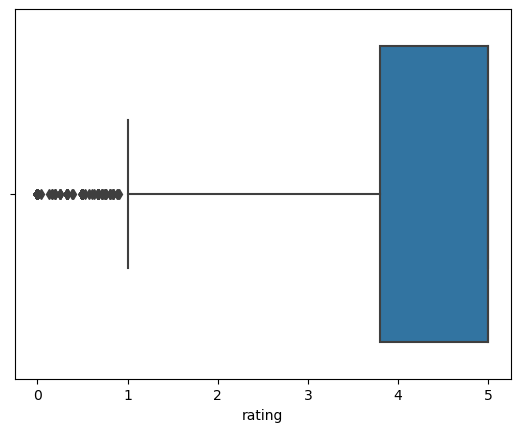

In [171]:
sns.boxplot(x = 'rating', data=users_sorted, whis=(15, 100));

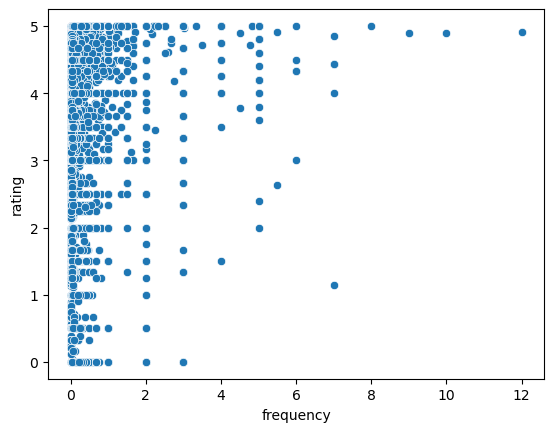

In [162]:
sns.scatterplot(x = 'frequency', y='rating', data = user_sorted);

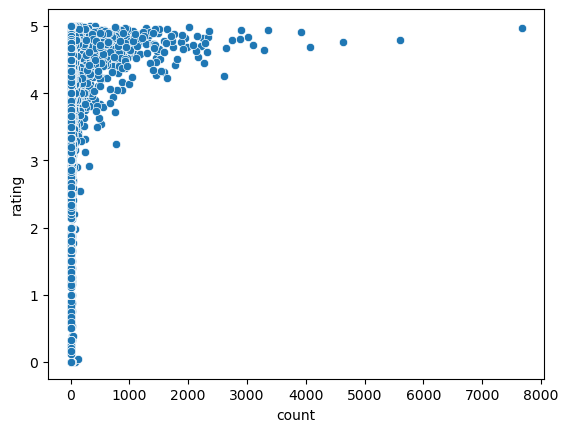

In [161]:
sns.scatterplot(x = 'count', y='rating', data = user_sorted);

Really hard to see what's going on here. Let's do these plots again but without people who have rated less than n amount of times.

In [177]:
n = 10

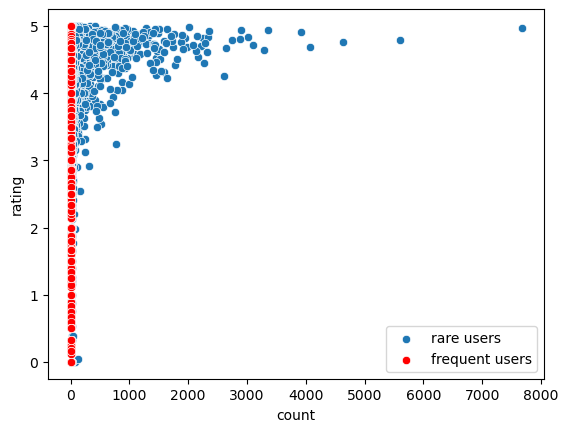

In [191]:
sns.scatterplot(x = 'count', y='rating', data = user_sorted[users_sorted['count']>n]);
sns.scatterplot(x = 'count', y='rating', data = user_sorted[users_sorted['count']<n], color = 'r');
plt.legend(['rare users','frequent users']);

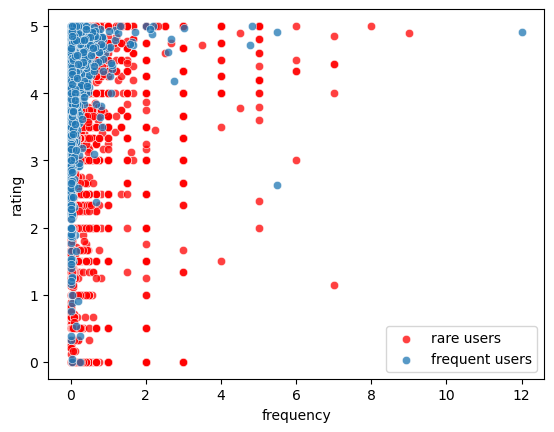

In [190]:
sns.scatterplot(x = 'frequency', y='rating', data = user_sorted[users_sorted['count']<n], color = 'r', alpha = 0.75);
sns.scatterplot(x = 'frequency', y='rating', data = user_sorted[users_sorted['count']>n],alpha = 0.75);
plt.legend(['rare users','frequent users']);

## Notes

### EDA Goals
- Understand your data:
    - user level
    - recipe level
    - review level

How do users behave when they're rating recipes? And eventually a model that represents this

Keeping power users is keeping interesting data which is important

#### When Plotting: 
- What is the goal of this plot? Visualization only, no need to change the data


#### Creating Metrics:
- filter origin data into a separate representative datafram
- .isin() will be helpful
- how many reviews over the total time they have been reviewing initial time, final time, how many times in between, hist, or relational (frequency vs. word count) scatter
- relationship between reviews & steps/time
- user level metrics each user, ti, tf, average review, frequency
- do the same for recipe level metrics

Try vectorizing words in python, take all the words, how many times do they occur, deliminate by ''

#### Using Inferential Statistics:
- difference of mean
- null hyp is these two groups are the same,

- average number of words
- get p-value, measure p-value against own CI that I choose,
- then reject or accept

- whats the avg
- mean
- plot users average time difference between ratings mean

In [107]:
interactions['review'][2]

'This worked very well and is EASY.  I used not quite a whole package (10oz) of white chips.  Great!'